In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [3]:
def bitree(n):
    h = np.power(2., -n);
    nl = 1;
    for i in range(n):
        nl *= 2
    tree =  0.5*h + h*np.linspace(0, nl, nl, endpoint=False)
    return tree

In [4]:
def fx(x):
    return np.exp(-32*(0.5-x)**2)

In [5]:
def restriction(fxl):
    #restricts or averages from l to l-1
    _fx = []
    for i in range(len(fxl)):
        if (i%2 == 1):
            val = 0.5*(fxl[i-1] + fxl[i]); 
            _fx.append(val);
    return _fx;

#Apply ghost
nghost = 2;
def boundary(x, fx):
    #symmetric boundary for fx at x=0, x=1
    xb = []
    fxb =[]
    l = len(x)
    for i_ in range(nghost):
        i = nghost-i_-1;
        xb.append(-x[i])
        fxb.append(fx[i])
    for i in range(l):
        xb.append(x[i])
        fxb.append(fx[i])
    for i_ in range(nghost):
        i = (l-nghost)-i_+1
        xb.append(2. - x[i])
        fxb.append(fx[i])
    return xb,fxb

def prolongation(xl_1, fxl_1):
    #interpolates from l-1 to l
    _x, _fx = boundary(xl_1, fxl_1);
    fxl = []
    for _i in range(len(fxl_1)):
        i = _i + nghost
        val = 0.25* _fx[i-1] + 0.75* _fx[i]
        fxl.append(val)
        val = 0.75* _fx[i] + 0.25* _fx[i+1]
        fxl.append(val)
    return fxl;

In [6]:
x4 = bitree(4)
x3 = bitree(3)
x10 = bitree(10) # ~1000 points for reference only
fx10 = fx(x10)

In [8]:
fx4 = fx(x4)

In [9]:
#restricted to coarser level
fx3 = restriction(fx4)

In [10]:
Ifx4 = prolongation(x3, fx3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


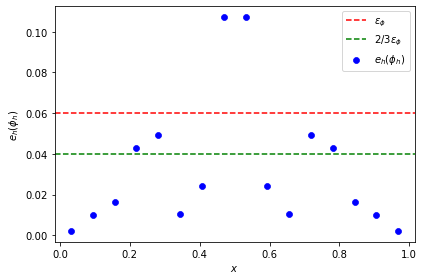

In [12]:

fig, ax1 = plt.subplots()

cols = ["#7aa0c4", "#ca82e1", "#8bcd50", "#df9f53", "#64b9a1",
        "#745ea6", "#db7e76"]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", cols)


ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$e_h(\phi_h )$")
pl3 = ax1.scatter(x4, abs(Ifx4-fx4), linewidth = 0.7, label =  r"$e_h(\phi_h )$", c = 'b');#label = 
                  #r"${e}_h (\phi_h (x_h))= |\phi_h  - \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h}\phi_h (x_h)$", c = 'red');#color = "#7aa0c4")

plt.axhline(y = .06, color = 'r', linestyle = 'dashed', label = r'$\epsilon_\phi$') 
plt.axhline(y = .04, color = 'g', linestyle = 'dashed', label = r'$2/3 \epsilon_\phi$') 
ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt-error.png")
plt.savefig("bitree-adpt-error.eps")


plt.show()